In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [6]:
df = df.drop(columns=['id'])

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RhythmScore,524164.0,0.632843,0.156899,0.076900,0.515850,0.634686,0.739179,0.975000
AudioLoudness,524164.0,-8.379014,4.616221,-27.509725,-11.551933,-8.252499,-4.912298,-1.357000
VocalContent,524164.0,0.074443,0.049939,0.023500,0.023500,0.066425,0.107343,0.256401
AcousticQuality,524164.0,0.262913,0.223120,0.000005,0.069413,0.242502,0.396957,0.995000
InstrumentalScore,524164.0,0.117690,0.131845,0.000001,0.000001,0.074247,0.204065,0.869258
LivePerformanceLikelihood,524164.0,0.178398,0.118186,0.024300,0.077637,0.166327,0.268946,0.599924
MoodScore,524164.0,0.555843,0.225480,0.025600,0.403921,0.564817,0.716633,0.978000
TrackDurationMs,524164.0,241903.692949,59326.601501,63973.000000,207099.876625,243684.058150,281851.658500,464723.228100
Energy,524164.0,0.500923,0.289952,0.000067,0.254933,0.511800,0.746000,1.000000
BeatsPerMinute,524164.0,119.034899,26.468077,46.718000,101.070410,118.747660,136.686590,206.037000


In [8]:
X = df.drop(columns=['BeatsPerMinute'])
y = df['BeatsPerMinute']

In [9]:
df.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [10]:
X.corr()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
RhythmScore,1.000000,-0.017385,0.008737,0.028203,0.010992,0.031535,-0.008946,-0.017640,-0.147350
AudioLoudness,-0.017385,1.000000,-0.009357,-0.013019,0.003772,-0.021620,-0.027305,0.004510,0.192411
VocalContent,0.008737,-0.009357,1.000000,0.009370,-0.017739,-0.120294,0.058675,0.018179,0.016124
AcousticQuality,0.028203,-0.013019,0.009370,1.000000,0.003247,0.009678,0.037047,-0.022524,-0.418184
InstrumentalScore,0.010992,0.003772,-0.017739,0.003247,1.000000,-0.002403,0.004738,0.009340,-0.019834
LivePerformanceLikelihood,0.031535,-0.021620,-0.120294,0.009678,-0.002403,1.000000,0.015461,0.005179,-0.266256
MoodScore,-0.008946,-0.027305,0.058675,0.037047,0.004738,0.015461,1.000000,-0.014803,-0.241713
TrackDurationMs,-0.017640,0.004510,0.018179,-0.022524,0.009340,0.005179,-0.014803,1.000000,0.048597
Energy,-0.147350,0.192411,0.016124,-0.418184,-0.019834,-0.266256,-0.241713,0.048597,1.000000


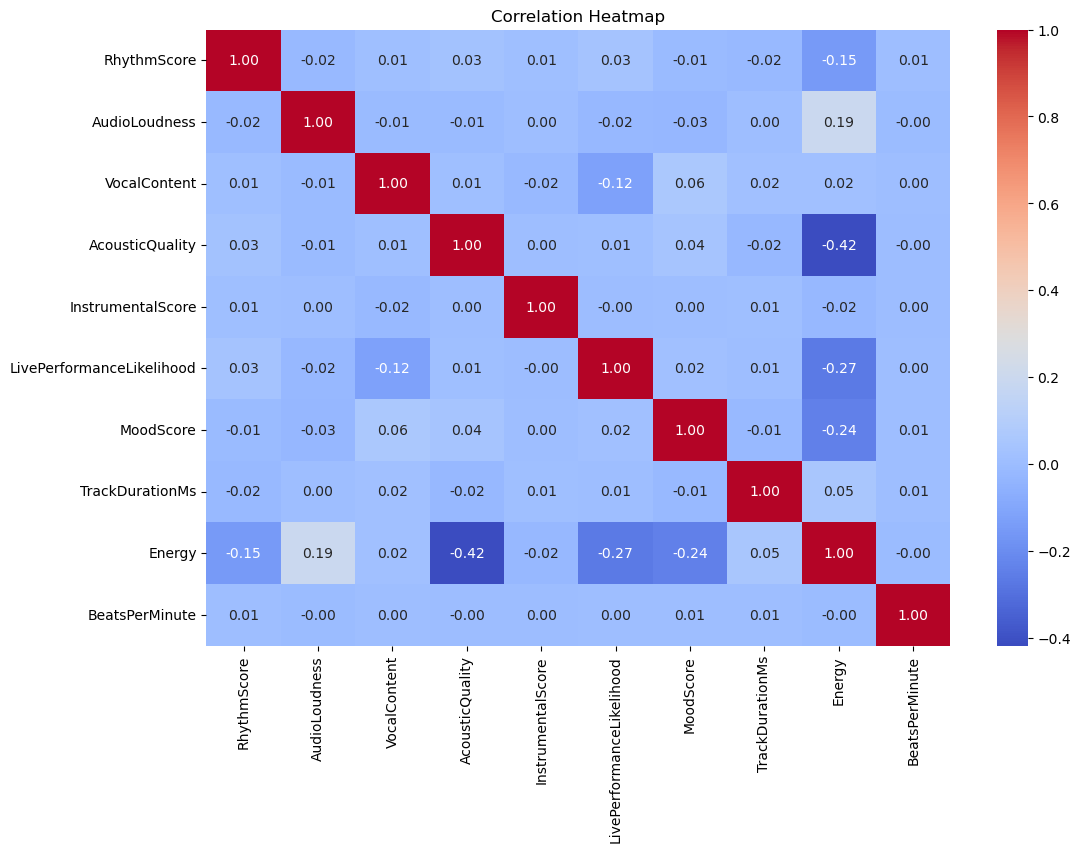

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

There's little to no correlation with the given features, we would have to dig deeper in feature engineering to see if some interaction of higher term has any correlation.

In [13]:
def plot(col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

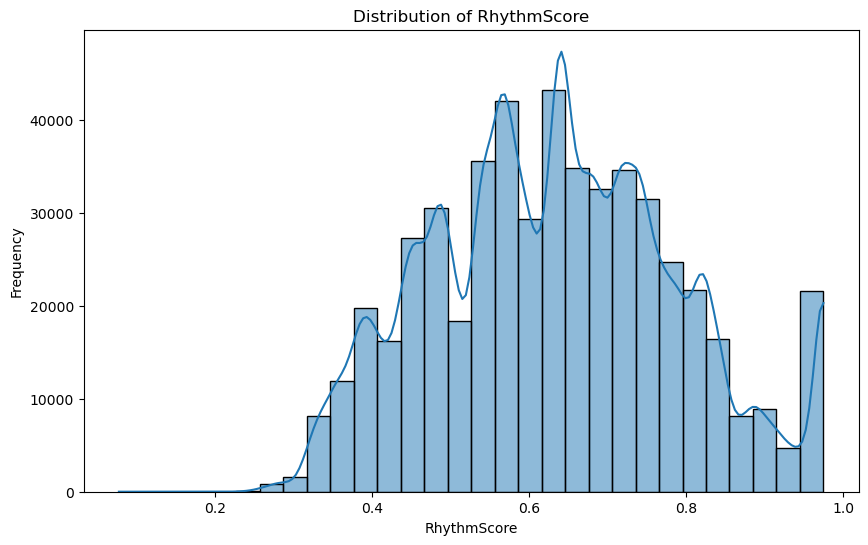

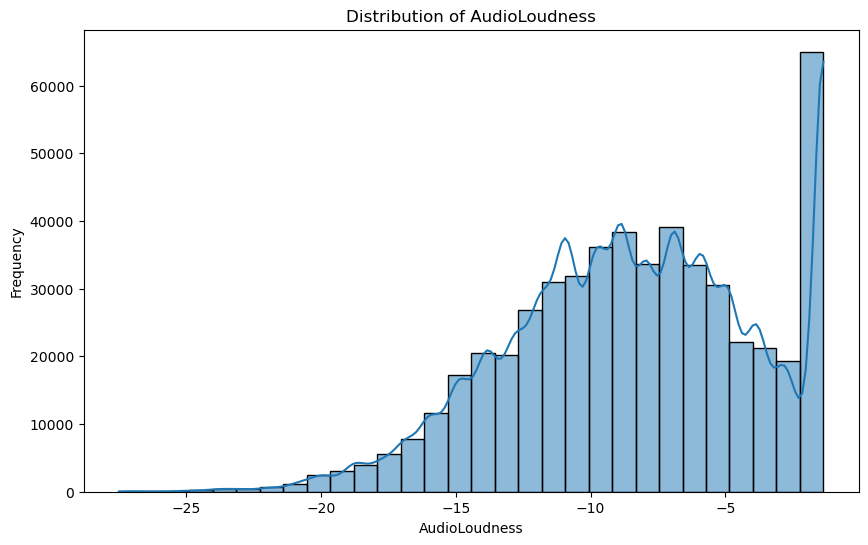

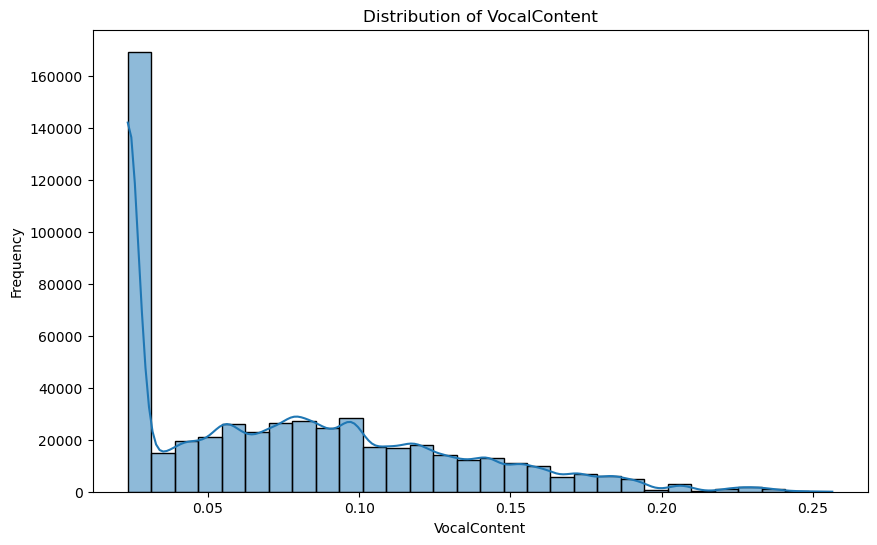

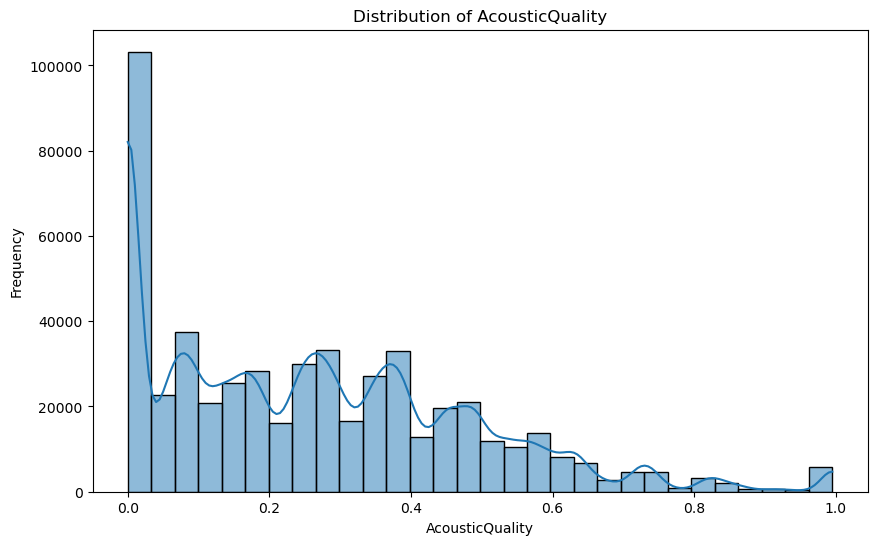

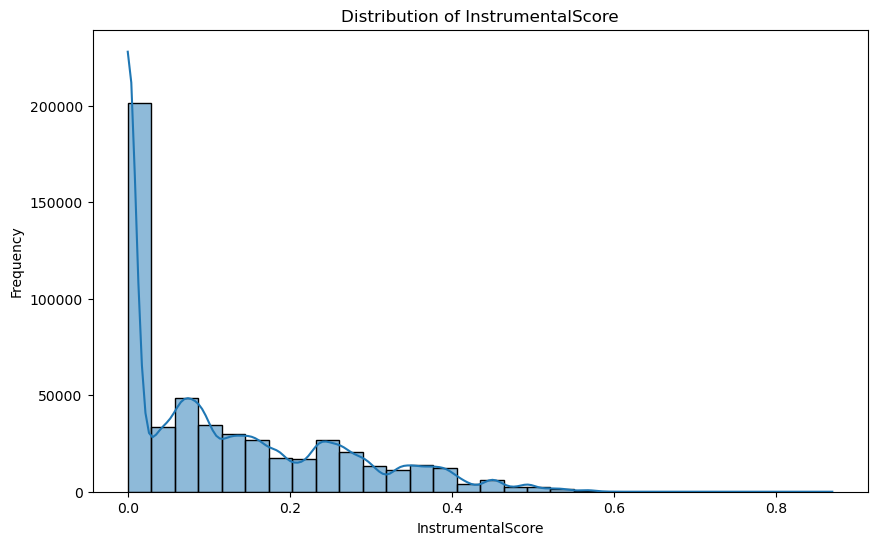

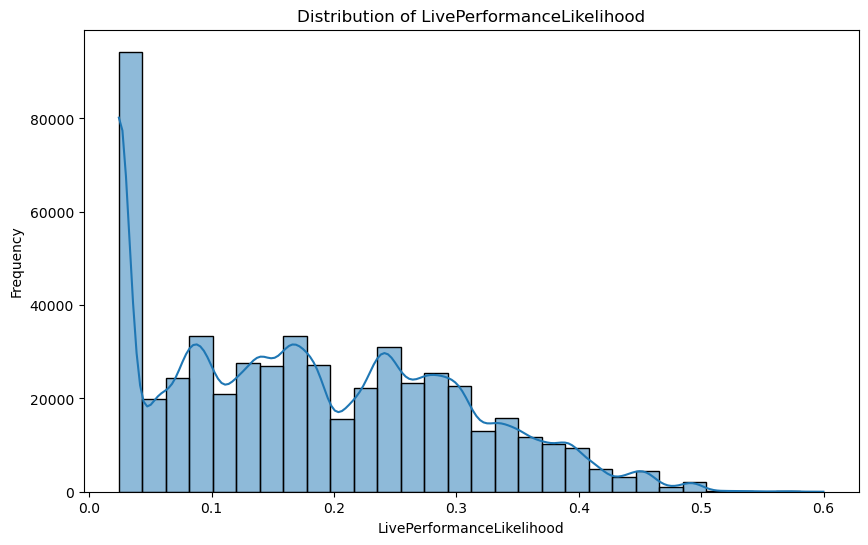

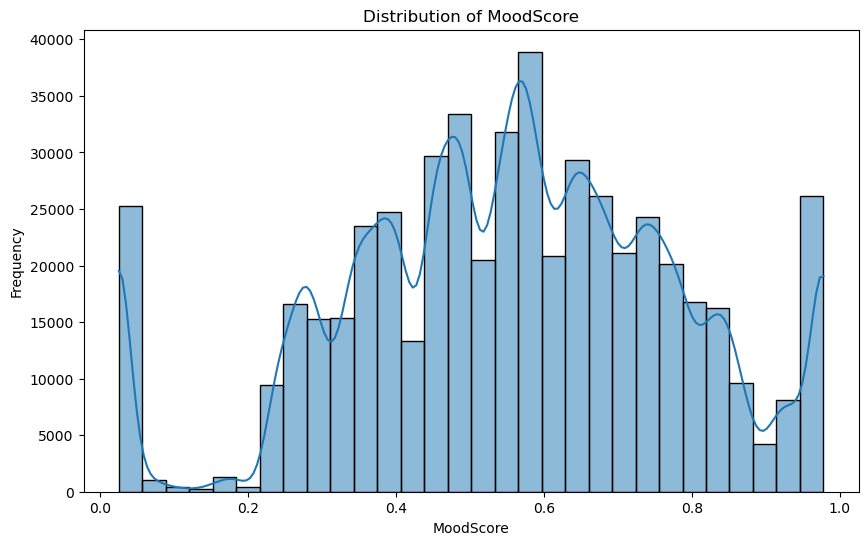

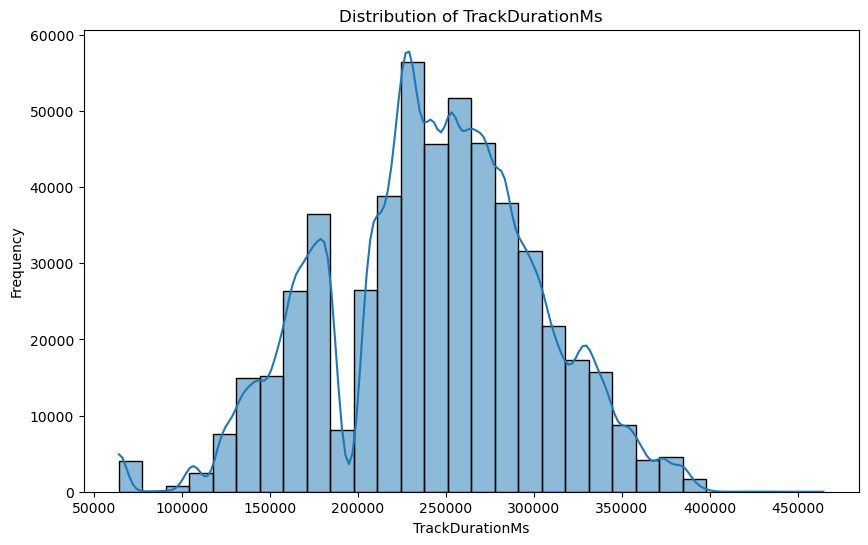

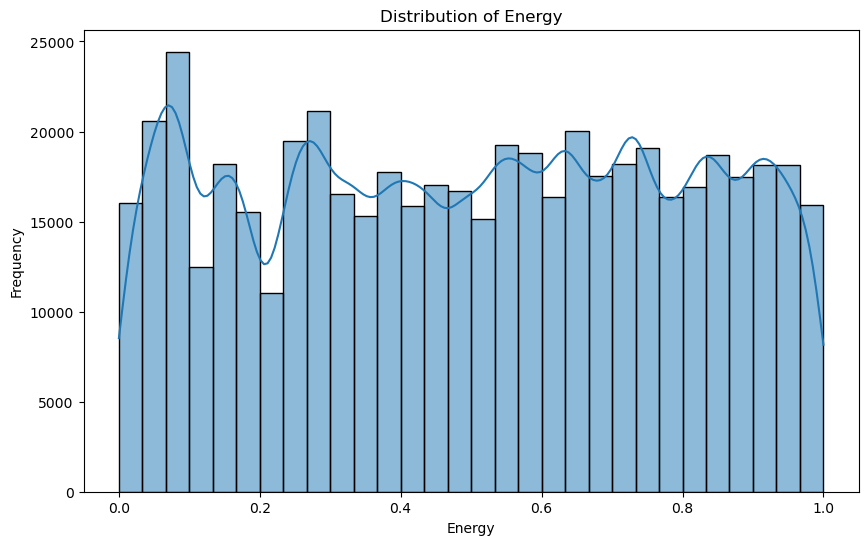

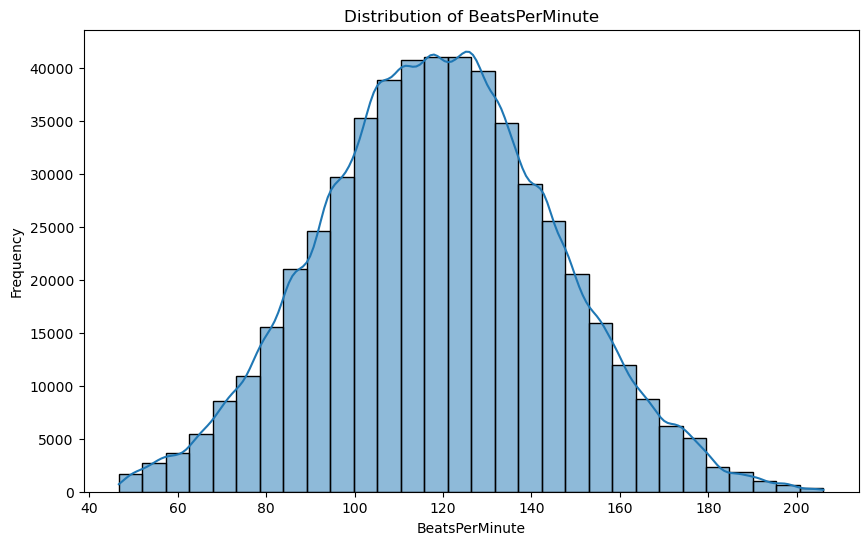

In [14]:
for col in df.columns:
    plot(col)